<a href="https://colab.research.google.com/github/Sai9025/machine-learning/blob/linear/Logistic_Regression_Ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Logistic Regression with scikit-learn - Example 1

There are several general steps you’ll take when you’re preparing your classification models:

- Import packages, functions, and classes
- Get data to work with and, if appropriate, transform it
- Create a classification model and train (or fit) it with your existing data
- Evaluate your model to see if its performance is satisfactory

In [114]:
#1. Import Packages, Functions and classes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [126]:
#Get data
data=pd.read_csv('penguins.csv')
data.shape



(344, 9)

In [116]:
data.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [117]:
data.nunique().sum()

748

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [99]:
data.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [120]:
data['bill_length_mm'].fillna(43.9,inplace=True)
data['bill_depth_mm'].fillna(17.1,inplace=True)
data['flipper_length_mm'].fillna(200.9,inplace=True)
data['body_mass_g'].fillna(4201.7,inplace=True)


In [127]:
data.species[:].head(3)

0         Adelie
1         Adelie
2         Adelie
3         Adelie
4         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 344, dtype: object

In [102]:
X=data.drop('year',axis=1).values

y = data['year'].values

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [104]:
#3. Create model and train it
model = LogisticRegression(C=0.5)
model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [105]:
#attributes of your model
model.classes_

array([2007, 2008, 2009])

In [106]:
model.intercept_

array([ 0.00170309, -0.00109452, -0.00060857])

In [107]:
model.coef_

array([[-1.23418528e-02,  2.43221762e-01,  4.63369642e-02,
        -4.90114543e-02,  9.93801916e-05],
       [ 9.63269975e-04, -6.95856144e-02, -4.41515785e-02,
         2.04226840e-02, -6.69862602e-05],
       [ 1.13785828e-02, -1.73636148e-01, -2.18538564e-03,
         2.85887703e-02, -3.23939315e-05]])

In [108]:
#4. Evaluate the model
model.predict_proba(X_test)

array([[0.02274263, 0.21314994, 0.76410743],
       [0.20108449, 0.23554395, 0.56337156],
       [0.37702404, 0.25132248, 0.37165348],
       [0.31702753, 0.43739397, 0.2455785 ],
       [0.49849185, 0.231812  , 0.26969615],
       [0.38248402, 0.33790577, 0.27961021],
       [0.28103342, 0.42190804, 0.29705854],
       [0.75872794, 0.19666967, 0.04460239],
       [0.2399369 , 0.39296644, 0.36709666],
       [0.38727903, 0.34186557, 0.2708554 ],
       [0.51318543, 0.33086418, 0.15595039],
       [0.09408787, 0.38296593, 0.5229462 ],
       [0.63333684, 0.16620315, 0.20046001],
       [0.2852928 , 0.45848592, 0.25622128],
       [0.27596663, 0.46821366, 0.25581971],
       [0.73520437, 0.19812545, 0.06667018],
       [0.52157692, 0.37276552, 0.10565755],
       [0.18290537, 0.41222388, 0.40487075],
       [0.69513703, 0.23324185, 0.07162112],
       [0.59304658, 0.28442674, 0.12252668],
       [0.17561842, 0.42916934, 0.39521224],
       [0.30533032, 0.41126151, 0.28340817],
       [0.

In [109]:
#get the actual predictions
y_pred = model.predict(X_test)
print(y_pred)

[2009 2009 2007 2008 2007 2007 2008 2007 2008 2007 2007 2009 2007 2008
 2008 2007 2007 2008 2007 2007 2008 2008 2009 2007 2008 2007 2008 2007
 2009 2008 2008 2008 2009 2008 2008 2008 2009 2008 2007 2008 2008 2007
 2008 2009 2009 2009 2007 2009 2009 2007 2007 2009 2007 2008 2009 2009
 2007 2007 2008 2007 2009 2007 2009 2009 2007 2007 2007 2008 2007 2009
 2007 2008 2008 2009 2007 2007 2008 2007 2008 2009 2007 2009 2007 2007
 2009 2007]


In [110]:
#accuracy
model.score(X_test, y_test)

0.5232558139534884

In [111]:
confusion_matrix(y_test, y_pred)

array([[17,  6,  1],
       [12, 10,  4],
       [ 7, 11, 18]])

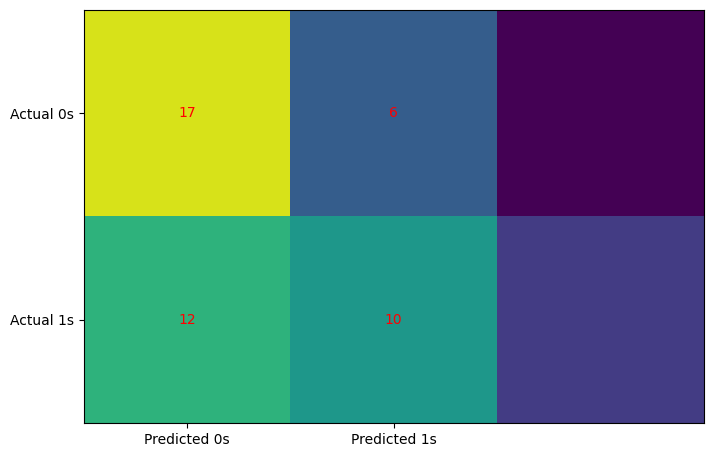

In [112]:
#visualization of confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [113]:
#more comprehensive report on the classification 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2007       0.47      0.71      0.57        24
        2008       0.37      0.38      0.38        26
        2009       0.78      0.50      0.61        36

    accuracy                           0.52        86
   macro avg       0.54      0.53      0.52        86
weighted avg       0.57      0.52      0.53        86

